[View in Colaboratory](https://colab.research.google.com/github/zronyj/matematica/blob/master/TransformacionesLinealesSimetria.ipynb)

# ¡Bienvenido a un cuaderno interactivo de Colaboratory!

En este ambiente podrás realizar diversas operaciones matemáticas y de programación que te permitirán aprender y desarrollarte en muchos ámbitos durante tu carrera. [Colaboratory](https://colab.research.google.com/) es solo una implementación de [Jupyter](http://jupyter.org/) (un cuaderno interactivo del lenguaje de programación Python) que ofrece Google de manera gratuita para poder realizar experimentos computacionales en línea. Esperamos que el ambiente sea de tu agrado y que lo sigas utilizando en tu proceso de formación.

In [1]:
# Esta celda contiene codigo (pero esta linea es simplemente un comentario)
# Para ejecutar lo que se te presenta en esta celda, solo pulsa Shift + Enter
3.5 + 2.6

6.1

Como puedes ver, esto es simple. Solo es necesario introducir las operaciones que deseas y pulsar Shift + Enter para obtener resultados.


---

Ahora entraremos en materia. Vamos a comenzar importando algunos paquetes y unos datos que nos servirán más adelante. Esto no es importante que sepas cómo se hace, pero vale la pena que sepas qué es.

In [0]:
# Ejecuta esta celda sin cambiar nada
import numpy as np              # NumPy (para operaciones matematicas)
import pandas as pd             # Pandas (para visualizar datos en tablas)
import matplotlib.pyplot as plt # MatPlotLib (para graficar)
np.set_printoptions(suppress=True)

Vamos a construir una molécula de **agua** a partir de las *coordenadas* de sus átomos.
Para ello vamos a crear un *diccionario* que va a contener las coordenadas de:
* El atomo de oxigeno **O**
* Los atomos de hidrogeno
    - Primer átomo de hidrógeno **H1**
    - Segundo átomo de hidrógeno **H2**

In [21]:
# Ejecuta esta celda sin cambiar nada
agua = {"O"  : np.array([0.00000, 0.50000]),
        "H1" : np.array([-0.76347, -0.09672]),
        "H2" : np.array([0.76347, -0.09672])}

# Luego vemos esto en forma de tabla
pd.DataFrame(agua)

,H1,H2,O
0,-0.76347,0.76347,0.0
1,-0.09672,-0.09672,0.5


Y en la siguiente celda vamos a visualizar cómo se vería esto como vectores.
Para graficar cada vector, debemos ingresar cada coordenada por separado.
Por eso de `agua["atomo"]` llamamos la coordenada **[0]** para **X** y **[1]** para **Y**.

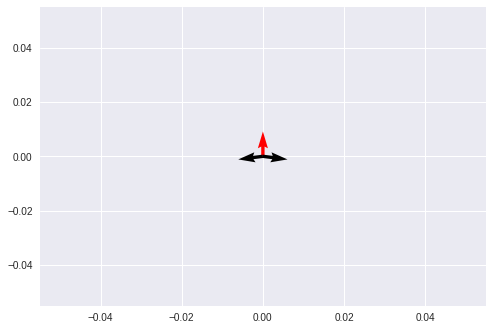

In [16]:
# Ejecuta esta celda sin cambiar nada
plt.quiver(agua["O"][0], agua["O"][1], color=["r"])
plt.quiver(agua["H1"][0], agua["H1"][1], color=["k"])
plt.quiver(agua["H2"][0], agua["H2"][1], color=["k"])

¡Ahora comienza la parte interesante! Sabemos que la molécula de agua, vista en 2D solo se refleja sobre el *eje Y*. Para comprobar la simetría, vamos a construir la matriz de reflexión **sigma** y vamos a reflejar todos los vectores con respecto del eje Y. El **vector normal** al plano de simetría puede ser [-1,0] o [1,0], ya que este es perpendicular al eje Y.

In [49]:
# Ejecuta esta celda sin cambiar nada

# Vector normal al plano de refleccion
normal = np.array([1,0])
# Matriz de proyeccion sobre el vector normal
proyeccion = np.outer(normal, normal) / np.dot(normal, normal)
# Matriz de refleccion
sigma = np.identity(2) - 2 * proyeccion
sigma

array([[-1.,  0.],
       [ 0.,  1.]])

In [44]:
# Ejecuta esta celda sin cambiar nada
Os = np.dot(sigma, agua["O"])
H1s = np.dot(sigma, agua["H1"])
H2s = np.dot(sigma, agua["H2"])
print "O reflejado es", Os
print "H1 reflejado es", H1s
print "H2 reflejado es", H2s

O reflejado es [0.  0.5]
H1 reflejado es [ 0.76347 -0.09672]
H2 reflejado es [-0.76347 -0.09672]


Al analizar detenidamente los resultados que obtuvimos, podremos notar que **las coordenadas del oxígeno no cambiaron** (evidentemente, pues este se halla sobre el plano de reflección), pero **las coordenadas de los hidrógenos sí**. Toma nota de esto, pues te servirá en tu discusión.


---

Ahora que ya sabes cómo se construye una matriz de transformación lineal y cómo se determina la simetría de una molécula, vamos a proceder a trabajar con 3 moléculas más:
* Amoníaco
* Hidrazina
* Aleno

In [74]:
# Molecula de amoniaco
amoniaco = {"N"  : np.array([0.0000000000, 0.0000000000, 0.3000000000]),
            "H1" : np.array([-0.4698470048, 0.8137988769, -0.094127113]),
            "H2" : np.array([-0.4698470048, -0.8137988769, -0.094127113]),
            "H3" : np.array([0.9396940028, 0.0000000000, -0.094127113])}
pd.DataFrame(amoniaco)

,H1,H2,H3,N
0,-0.469847,-0.469847,0.939694,0.0
1,0.813799,-0.813799,0.000000,0.0
2,-0.094127,-0.094127,-0.094127,0.3


In [53]:
# Molecula de hidrazina
hidrazina = {"N1": np.array([0.7101, 0.0000, 0.0000]),
             "N2": np.array([-0.7101, 0.0000, 0.0000]),
             "H1": np.array([1.0429, -0.5396, 0.7978]),
             "H2": np.array([1.0453, -0.4863, -0.8305]),
             "H3": np.array([-1.0453, -0.9592, -0.0786]),
             "H4": np.array([-1.0429, 0.4854, -0.8318])}
pd.DataFrame(hidrazina)

,H1,H2,H3,H4,N1,N2
0,1.0429,1.0453,-1.0453,-1.0429,0.7101,-0.7101
1,-0.5396,-0.4863,-0.9592,0.4854,0.0000,0.0000
2,0.7978,-0.8305,-0.0786,-0.8318,0.0000,0.0000


In [138]:
# Molecula de aleno
aleno = {"C1": np.array([1.2981,  0.0002,  0.0000]),
         "C2": np.array([-1.2981,  0.0002,  0.0000]),
         "C3": np.array([0.0000, -0.0003,  0.0000]),
         "H1": np.array([1.8504, -0.9289, -0.0800]),
         "H2": np.array([1.8498,  0.9294,  0.0812]),
         "H3": np.array([-1.8507,  0.0790, -0.9286]),
         "H4": np.array([-1.8496, -0.0796,  0.9299])}
pd.DataFrame(aleno)

,C1,C2,C3,H1,H2,H3,H4
0,1.2981,-1.2981,0.0000,1.8504,1.8498,-1.8507,-1.8496
1,0.0002,0.0002,-0.0003,-0.9289,0.9294,0.0790,-0.0796
2,0.0000,0.0000,0.0000,-0.0800,0.0812,-0.9286,0.9299


A continuación vamos a visualizar estas moléculas de manera vectorial **en 3D** para facilitar lo que estamos buscando.

In [0]:
#@title
from mpl_toolkits.mplot3d import Axes3D

def graficar(molecula, d=1, lat=0, lon=80):
  fig = plt.figure()
  ax = fig.gca(projection='3d')
  for a in molecula.keys():
    if a[0] == "N":
      c = "b"
    elif a[0] == "C":
      c = "#BBBBBB"
    else:
      c = "k"
    ax.quiver([0], [0], [0], molecula[a][0], molecula[a][1], molecula[a][2],
              color = [c], length=1, arrow_length_ratio=0.2)
  ax.set_xlim([-d, d])
  ax.set_ylim([-d, d])
  ax.set_zlim([-d, d])
  ax.view_init(lat, lon)

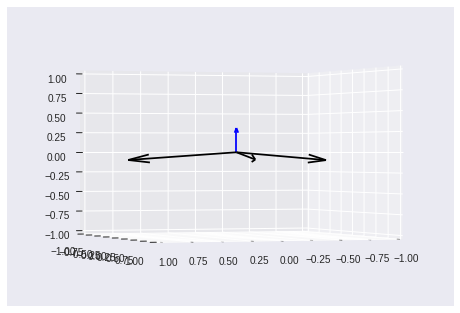

In [92]:
graficar(amoniaco, lat=0, lon=70)

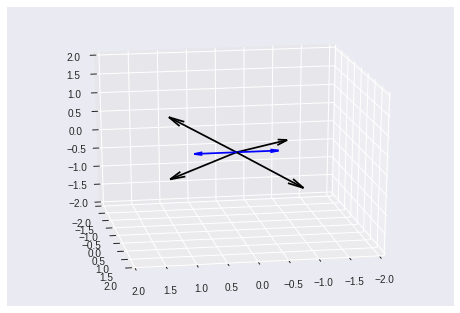

In [157]:
graficar(hidrazina, d=2, lat=20, lon=80)

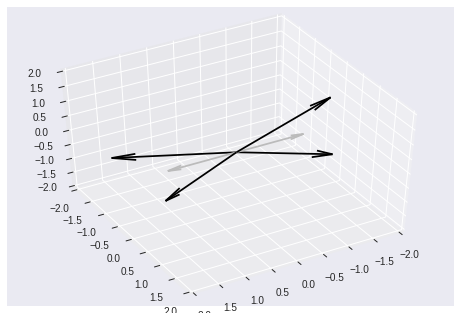

In [139]:
graficar(aleno, d=2, lat=45, lon=60)

Ahora vamos a requerir herramientas nuevas. Hemos estado trabajando en 2D hasta ahora, pero para poder trabajar con moléculas se requiere de matrices de **rotación** y **reflexión** en 3D. Vamos a definirlas y después continuaremos con las simetrías.

In [0]:
# Creamos la matriz de rotacion; esta necesitara un vector de eje y un angulo
def rotacion(eje, angulo):
  e = eje / np.linalg.norm(eje)
  a = np.pi * angulo / 180
  rot1 = np.cos(a) * np.identity(3)
  rot2 = np.sin(a) * np.array([[    0, -e[2],  e[1]],
                               [ e[2],     0, -e[0]],
                               [-e[1],  e[0],     0]])
  rot3 = (1 - np.cos(a)) * np.outer(e, e)
  return rot1 + rot2 + rot3

In [0]:
# Creamos la matriz de refleccion; esta necesitara el vector normal al plano
def reflexion(normal):
  n = normal / np.linalg.norm(normal)
  e = np.identity(3)
  p = np.outer(n, n)
  return e - 2 * p

Ahora viene la parte importante: vamos a probar las simetrías de las moléculas. Para ello debemos aplicar las matrices de rotación y reflexión a los vectores que representan los átomos en las moléculas de amoníaco, hidrazina y aleno.

Un par de datos importantes a mencionar es que es posible **utilizar los mismos vectores de las moléculas como ejes o vectores normales a algún plano**. En otros casos, conviene recordar que **el producto cruz entre dos vectores da como resultado un vector normal** a los dos vectores.

Entonces, lo primero que debe probarse es:
1. Amoníaco
    - Planos de reflexión (cuántos hay y cómo se sabe que existen)
    - Ejes de rotación (cuántos hay y cómo se sabe dónde están)
2. Hidrazina
    - ¿Es posible encontrar alguna simetría en la molécula?
    - ¿Qué se necesitaría para hallar la simetría?
3. Aleno
    - ¿Cuántos ejes de rotación tiene la molécula?
    - ¿Cuántos planos de reflexión tiene la molécula?